In [ ]:
# 서울시에서 코로나 확진자 발표
#시계열 분석하려면 정답지가 있어야 함
#코로나 데이터 들고와서 임의로 끊는다. 정답지 - 기간별 사망자, 감염자수 등등

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [3]:
plt.rc("font", family="Malgun Gothic")

In [6]:
covid19 = pd.read_csv("../data/seoul_covid19.csv")
covid19

C:\Users\SW\AppData\Local\Temp\ipykernel_13980\2557537514.py:1: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  covid19 = pd.read_csv("../data/seoul_covid19.csv")


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


<Axes: xlabel='확진일'>

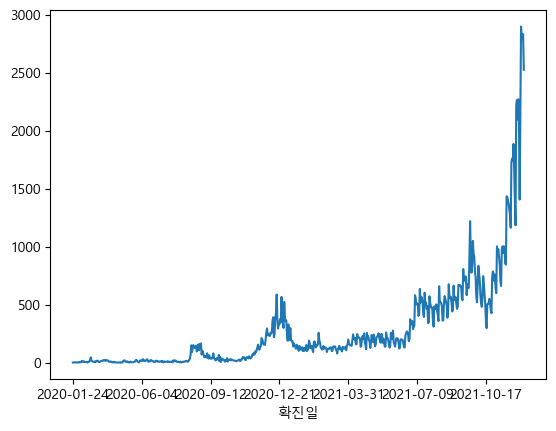

In [7]:
covid19.groupby("확진일")["연번"].count().plot()

<Axes: xlabel='확진일'>

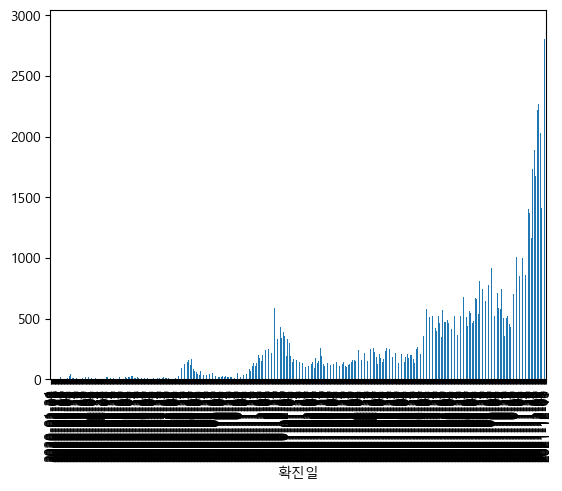

In [8]:
covid19.groupby("확진일")["연번"].count().plot(kind="bar")

In [9]:
covid19["지역"].unique()

array(['기타', '성북구', '중구', '광진구', '종로구', '중랑구', '강동구', '강북구', '노원구',
       '서대문구', '금천구', '송파구', '은평구', '성동구', '동작구', '양천구', '관악구', '구로구',
       '용산구', '강남구', '도봉구', '동대문구', '서초구', '강서구', '마포구', '영등포구', '타시도',
       '송파구 ', '서초구 ', '송파', '관악구 ', '동대문', '영등포', '서대문', '마포구 '],
      dtype=object)

In [10]:
covid19.loc[covid19["지역"]=="관악구"]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
40,182518,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
51,182507,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
70,182488,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
91,182467,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
200,182358,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182440,118,2020-03-07,6845.0,NaN,510419-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182471,87,2020-02-29,3491.0,NaN,690602-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182484,74,2020-02-28,2466.0,NaN,700817-1,관악구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182505,53,2020-02-26,1295.0,NaN,800216-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


In [14]:
covid19["지역"] = covid19["지역"].apply(lambda x:x.strip()) #lambda - 함수 이름 안 정할꺼고 x는 매개변수. : 다음이 본체

In [15]:
covid19.loc[covid19["지역"]=="관악구 "]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부


In [16]:
target = ["동대문", "서대문", "송파", "영등포"]

In [18]:
#구를 concat
# sum = 0
# for i in range(10):
# sum = sum + i
covid19["지역"] = covid19["지역"].apply(lambda x : x + "구" if x in target else x)

In [19]:
covid19["지역"]

0          기타
1         성북구
2          중구
3          기타
4         광진구
         ... 
182553    성북구
182554    마포구
182555    종로구
182556    중랑구
182557    강서구
Name: 지역, Length: 182558, dtype: object

In [20]:
covid19.head() # 시계열은 x,y 값 정해져있다. x는 날짜.

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


In [25]:
covid19_df = covid19.groupby("확진일")["연번"].count().reset_index()
covid19_df

,확진일,연번
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [26]:
covid19_df.columns = ["ds", "y"]
covid19_df

,ds,y
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [27]:
from prophet import Prophet

In [37]:
m = Prophet()
m.fit(covid19_df)

17:50:54 - cmdstanpy - INFO - Chain [1] start processing
17:50:55 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
681,2022-01-06
682,2022-01-07
683,2022-01-08
684,2022-01-09
685,2022-01-10


In [39]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-24,-25.004850,-246.250120,250.357903,-25.004850,-25.004850,23.240609,23.240609,23.240609,23.240609,23.240609,23.240609,0.0,0.0,0.0,-1.764241
1,2020-01-30,-22.776520,-245.220514,229.545770,-22.776520,-22.776520,27.225276,27.225276,27.225276,27.225276,27.225276,27.225276,0.0,0.0,0.0,4.448756
2,2020-01-31,-22.405132,-245.791895,240.506039,-22.405132,-22.405132,23.240609,23.240609,23.240609,23.240609,23.240609,23.240609,0.0,0.0,0.0,0.835478
3,2020-02-02,-21.662355,-315.646093,169.446564,-21.662355,-21.662355,-59.892076,-59.892076,-59.892076,-59.892076,-59.892076,-59.892076,0.0,0.0,0.0,-81.554431
4,2020-02-05,-20.548190,-251.727745,250.974390,-20.548190,-20.548190,29.304648,29.304648,29.304648,29.304648,29.304648,29.304648,0.0,0.0,0.0,8.756458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2022-01-06,1706.470112,1474.907777,1976.879212,1701.528922,1712.395332,27.225276,27.225276,27.225276,27.225276,27.225276,27.225276,0.0,0.0,0.0,1733.695388
682,2022-01-07,1715.064301,1484.319856,1971.911062,1709.634377,1721.483223,23.240609,23.240609,23.240609,23.240609,23.240609,23.240609,0.0,0.0,0.0,1738.304910
683,2022-01-08,1723.658490,1474.181826,1960.220508,1717.791560,1730.660595,-2.985480,-2.985480,-2.985480,-2.985480,-2.985480,-2.985480,0.0,0.0,0.0,1720.673010
684,2022-01-09,1732.252679,1401.411508,1910.830083,1725.690394,1739.988706,-59.892076,-59.892076,-59.892076,-59.892076,-59.892076,-59.892076,0.0,0.0,0.0,1672.360602


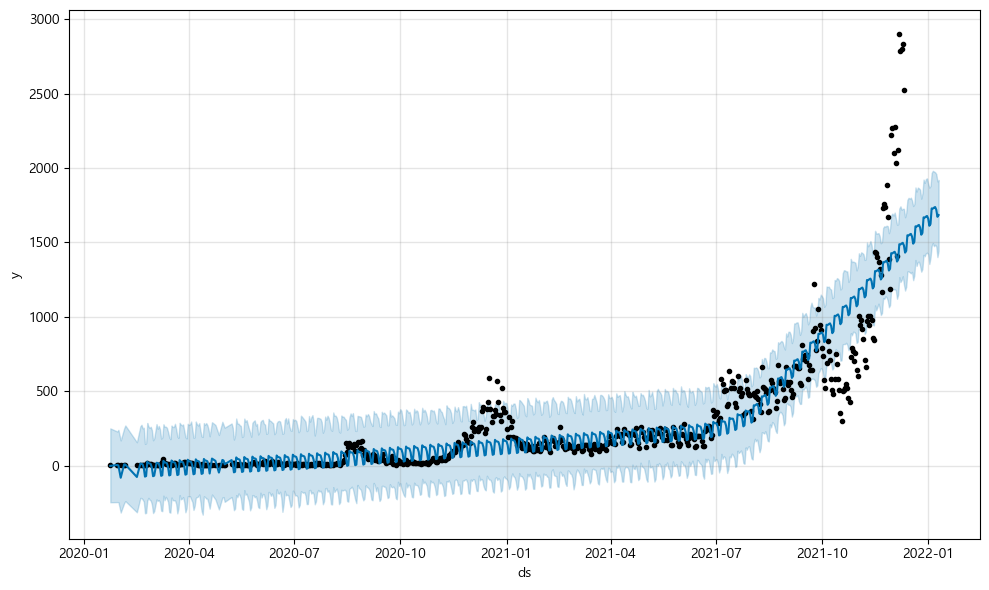

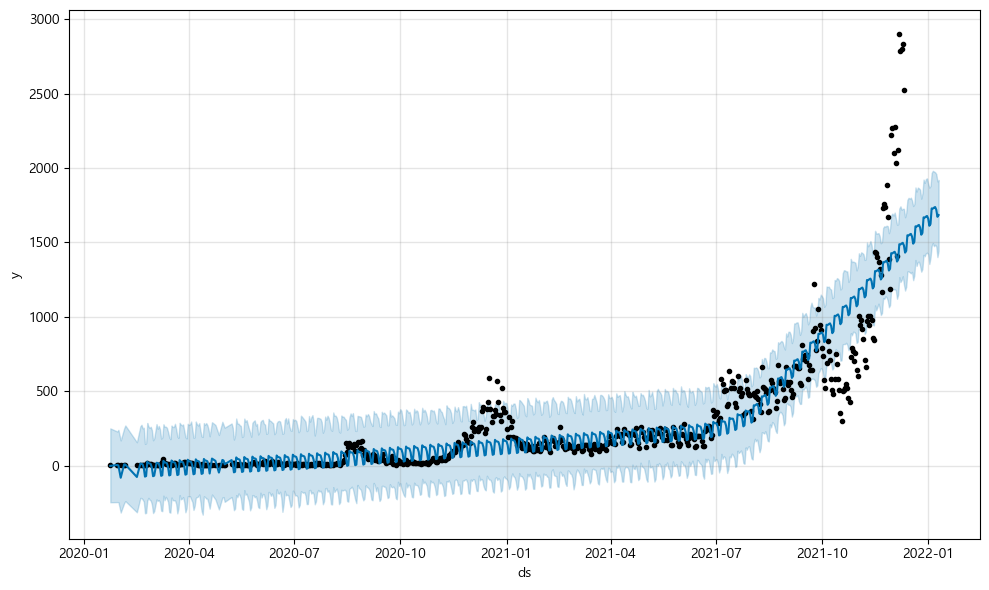

In [40]:
m.plot(forecast)

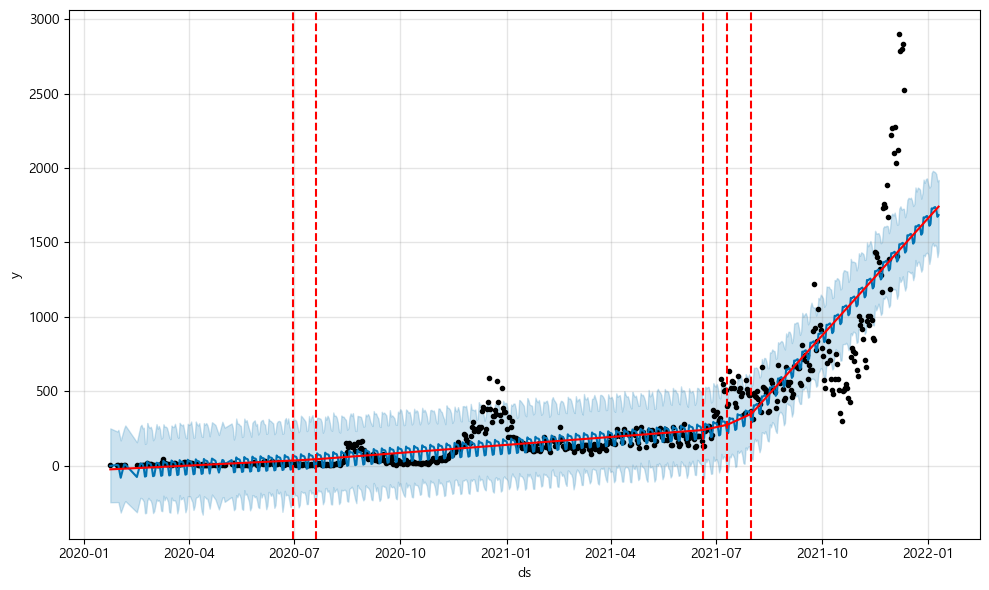

In [41]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)